# Convert `nsc_qa` to `iapp_wiki_qa_squad` format

In [114]:
%matplotlib inline
import numpy as np
import pandas as pd
from datasets import load_dataset,load_from_disk

datasets = load_dataset('json', 
                       data_files={'train':'nsc_qa/train_fold_1.json',
                                   'valid':'nsc_qa/validate_fold_1.json',
                                   'test':'nsc_qa/test_fold_1.json'},
                       field='data')
datasets = datasets.map(lambda x: x['paragraphs'][0])

W0707 22:02:20.335740 140472399693632 builder.py:357] Using custom data configuration default-c2ed17d9edc733d0
W0707 22:02:20.341271 140472399693632 builder.py:512] Reusing dataset json (/home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2)
W0707 22:02:20.379956 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-eb61fe9da0ad4b56.arrow
W0707 22:02:20.387268 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-e02350636e79cf03.arrow
W0707 22:02:20.393205 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggi

In [115]:
datasets['train'][3]

{'context': 'การทบทวนวรรณกรรม การทบทวนวรรณกรรม () เป็นเนื้อหาหลักส่วนหนึ่งในการเขียนรายงานการวิจัย โดยเน้นอธิบายเกี่ยวกับงานวิจัยหรือความรู้ในหัวข้อเดียวกันหรือใกล้เคียงในอดีต โดยการทบทวนวรรณกรรมนั้นมีจุดหมายในการรวบรวมข้อมูลปัจจุบันของผลงานวิจัยที่เกี่ยวข้อง การทบทวนวรรณกรรมมักจะพบได้ในงานเขียนด้านวิชาการ เช่นในวิทยานิพนธ์ ดุษฎีนิพนธ์ หรือผลงานในวารสารวิชาการ การทบทวนวรรณกรรมมักจะถูกลำดับเป็นส่วนที่สองของงานเขียนต่อจากบทนำ และมักจะอยู่ก่อนหน้าเป้าหมายงานวิจัย และขั้นตอนการวิจัย',
 'paragraphs': [{'context': 'การทบทวนวรรณกรรม การทบทวนวรรณกรรม () เป็นเนื้อหาหลักส่วนหนึ่งในการเขียนรายงานการวิจัย โดยเน้นอธิบายเกี่ยวกับงานวิจัยหรือความรู้ในหัวข้อเดียวกันหรือใกล้เคียงในอดีต โดยการทบทวนวรรณกรรมนั้นมีจุดหมายในการรวบรวมข้อมูลปัจจุบันของผลงานวิจัยที่เกี่ยวข้อง การทบทวนวรรณกรรมมักจะพบได้ในงานเขียนด้านวิชาการ เช่นในวิทยานิพนธ์ ดุษฎีนิพนธ์ หรือผลงานในวารสารวิชาการ การทบทวนวรรณกรรมมักจะถูกลำดับเป็นส่วนที่สองของงานเขียนต่อจากบทนำ และมักจะอยู่ก่อนหน้าเป้าหมายงานวิจัย และขั้นตอนการวิจัย',
   'qas': [{

In [116]:
def convert_nscqa_to_iapp(example):
    example['answers'] = {
        'text': example['qas'][0]['answers'][0]['text'],
        'answer_start': [np.int32(example['qas'][0]['answers'][0]['answer_start'])],
        'answer_end': [np.int32(example['qas'][0]['answers'][0]['answer_start'] + len(example['qas'][0]['answers'][0]['text']))],
    }
    example['context'] = example['context']
    example['article_id'] = str(example['title'])
    example['question_id'] = str(example['qas'][0]['id'])
    example['title'] = ''
    return example

In [117]:
datasets = datasets.map(convert_nscqa_to_iapp, remove_columns=['paragraphs','qas'])

W0707 22:02:20.476344 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-cd1e716d19682244.arrow
W0707 22:02:20.491229 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-8b5312c02ce0e323.arrow
W0707 22:02:20.500206 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-b53a32342a272a38.arrow


In [118]:
i = 300
example = datasets['train'][i]
example

{'answers': {'answer_end': [130],
  'answer_start': [109],
  'text': 'พิพิธภัณฑสถานแห่งชาติ'},
 'article_id': '938376',
 'context': 'วัดน้อย (จังหวัดน่าน) โบราณสถานวัดน้อย หรือเรียกโดยย่อว่า วัดน้อย เป็นวัดแห่งหนึ่งในจังหวัดน่าน ตั้งอยู่ภายในพิพิธภัณฑสถานแห่งชาติ น่านใกล้วัดพระธาตุช้างค้ำวรวิหาร สร้างตามพระประสงค์ในพระเจ้าสุริยพงษ์ผริตเดช และมีชื่อเสียงจากการเป็นวัดที่มีขนาดเล็กที่สุดในประเทศไทยประวัติ ประวัติ. พระเจ้าสุริยพงษ์ผริตเดช พระเจ้าผู้ครองนครน่าน ได้มีโอกาสเข้าเฝ้าพระบาทสมเด็จพระจุลจอมเกล้าเจ้าอยู่หัว พระเจ้ากรุงสยามในปี พ.ศ. 2416 เมื่อพระบาทสมเด็จพระจุลจอมเกล้าเจ้าอยู่หัวมีพระดำรัสตรัสถามถึงจำนวนวัดภายในน่าน พระเจ้าสุริยพงษ์ผริตเดชได้กราบทูลว่าในน่านมีวัดทั้งหมด 500 วัด เมื่อพระเจ้าสุริยพงษ์ผริตเดชกลับน่านจึงสำรวจจำนวนวัดใหม่อีกครั้ง ก็พบว่ามีวัดทั้งหมด 499 วัด คลาดไปหนึ่งวัด ด้วยเหตุนี้พระองค์จึงโปรดเกล้าฯ ให้ช่างพื้นเมืองน่านก่อสร้างวัดตรงโคนต้นโพหน้าหอคำหรือวังที่พระองค์ประทับ เพื่อให้วัดครบจำนวนตามที่กราบทูลพระเจ้ากรุงสยามเป็นสัจจวาจา และตั้งชื่อว่า "วัดน้อย" ต่อมาหอคำได

In [119]:
example['context'][example['answers']['answer_start'][0]:example['answers']['answer_end'][0]], example['answers']['text']

('พิพิธภัณฑสถานแห่งชาติ', 'พิพิธภัณฑสถานแห่งชาติ')

In [120]:
datasets.save_to_disk("nsc_qa_raw")

In [121]:
x = load_from_disk('nsc_qa_raw')
x

DatasetDict({
    train: Dataset({
        features: ['answers', 'article_id', 'context', 'question_id', 'title'],
        num_rows: 9045
    })
    valid: Dataset({
        features: ['answers', 'article_id', 'context', 'question_id', 'title'],
        num_rows: 1005
    })
    test: Dataset({
        features: ['answers', 'article_id', 'context', 'question_id', 'title'],
        num_rows: 4950
    })
})

In [122]:
datasets = datasets.map(lambda x: {'context_len':len(x['context'])})

W0707 22:02:20.865957 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-5de765666d6ac9a8.arrow
W0707 22:02:20.875899 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-ab69346083c02c45.arrow
W0707 22:02:20.887345 140472399693632 arrow_dataset.py:1518] Loading cached processed dataset at /home/cstorm125/.cache/huggingface/datasets/json/default-c2ed17d9edc733d0/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2/cache-cac782aba8f4850e.arrow


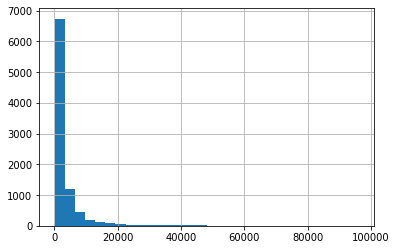

In [124]:
train_df = pd.DataFrame(datasets['train'])
train_df.context_len.hist(bins=30)

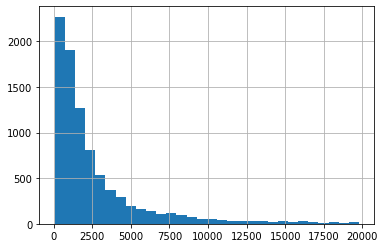

In [128]:
train_df[train_df.context_len<20000].context_len.hist(bins=30)

In [136]:
train_df[train_df.context_len<5000].sort_values('context_len',ascending=False)

,answers,article_id,context,context_len,question_id,title
3961,"{'answer_end': [254], 'answer_start': [238], '...",577444,สยามดารา สตาร์ส ปาร์ตี้ 2008 สยามดารา สตาร์ส ป...,4997,7907,
6365,"{'answer_end': [695], 'answer_start': [693], '...",577444,สยามดารา สตาร์ส ปาร์ตี้ 2008 สยามดารา สตาร์ส ป...,4997,7908,
817,"{'answer_end': [67], 'answer_start': [49], 'te...",78274,มนต์สิทธิ์ คำสร้อย มนต์สิทธิ์ คำสร้อย (ชื่อจริ...,4994,8900,
1213,"{'answer_end': [94], 'answer_start': [91], 'te...",93813,สมเด็จพระอริยวงษญาณ สมเด็จพระสังฆราช (ศรี) สมเ...,4989,8953,
3650,"{'answer_end': [180], 'answer_start': [168], '...",93813,สมเด็จพระอริยวงษญาณ สมเด็จพระสังฆราช (ศรี) สมเ...,4989,8954,
...,...,...,...,...,...,...
4532,"{'answer_end': [50], 'answer_start': [42], 'te...",31194,พ.ศ. 331 พุทธศักราช 331 ใกล้เคียงกับ ก่อน ค.ศ....,79,5703,
3585,"{'answer_end': [23], 'answer_start': [9], 'tex...",31194,พ.ศ. 331 พุทธศักราช 331 ใกล้เคียงกับ ก่อน ค.ศ....,79,5702,
1198,"{'answer_end': [5], 'answer_start': [3], 'text...",170177,ศพ ศพ คือ ร่างของมนุษย์ที่ตายแล้ว สำหรับร่างขอ...,74,3294,
2239,"{'answer_end': [44], 'answer_start': [42], 'te...",30742,พ.ศ. 596 พุทธศักราช 596 ใกล้เคียงกับ ค.ศ. 53เห...,73,6553,


In [137]:
train_df.context[3961]

'สยามดารา สตาร์ส ปาร์ตี้ 2008 สยามดารา สตาร์ส ปาร์ตี้ 2008 เป็นงานที่หนังสือพิมพ์สยามดาราจัดขึ้นเป็นครั้งแรก เพื่อเฉลิมฉลองครบรอบ 3 ปี ก้าวสู่ปีที่ 4 ของสยามดารา จึงได้จัดงาน สยามดารา สตาร์ส ปาร์ตี้ 2008 ในเย็นวันจันทร์ที่ 30 มิ.ย. 2551 ณ บาร์ยันที แม็กซ์ เพื่อมอบรางวัลอันทรงเกียรติแก่บุคคลในวงการบันเทิง โดยคัดเลือกสุดยอดแห่งปีของดารา, นักร้อง, ละคร, ภาพยนตร์, พิเศษเปิดให้แฟนๆ ผู้อ่านสยามดาราได้ร่วมโหวตว่าใครจะเป็นสตาร์เซ็กซี่, ละครยอดฮิต และภาพยนตร์ไทยยอดเยี่ยม พร้อมกับลุ้นของรางวัลมากมายอีกด้วย โดยรางวัลเกียรติยศนั้นทางคณะกรรมการคัดเลือกจากกอง บ.ก. สยามดารา โดยมีหลักเกณฑ์พิจารณาผลงานในรอบขวบปีที่ผ่านมา (ครึ่งหลังของปีพ.ศ. 2550 - ครึ่งแรกของปีพ.ศ. 2551) ได้พิจารณาว่าสมควรให้มีทั้งหมด 19 รางวัล ดังนี้รางวัลจากการคัดเลือกโดยคณะกรรมการนักร้องไทยสากล ยอดนิยมชายรางวัลจากการคัดเลือกโดยคณะกรรมการ. นักร้องไทยสากล ยอดนิยมชาย. - รัฐภูมิ โตคงทรัพย์ - สุกฤษฎิ์ วิเศษแก้ว - ธงไชย แมคอินไตย์ - ศักดิ์สิทธิ์ เวชสุภาพร - เรืองศักดิ์ ลอยชูศักดิ์ - ปองศักดิ์ รัตนพงษ์ - ศรัณยู วินัยพานิช - เจตริน วรรธนะสิ